In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
# Pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [ ]:
# You can only unzip a zipped tuple once before it is removed from the computer's memory. 
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities: 
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
import requests
requests.__version__

'2.26.0'

In [7]:
# Import the API key.
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d21a3496af4cbb0bf7a2cd6c497ea10'

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | isangel
Processing Record 2 of Set 13 | new norfolk
Processing Record 3 of Set 13 | natal
Processing Record 4 of Set 13 | beringovskiy
Processing Record 5 of Set 13 | nhulunbuy
Processing Record 6 of Set 13 | san vicente
Processing Record 7 of Set 13 | sao filipe
Processing Record 8 of Set 13 | bredasdorp
Processing Record 9 of Set 13 | punta arenas
Processing Record 10 of Set 13 | sahuaripa
Processing Record 11 of Set 13 | kenai
Processing Record 12 of Set 13 | dudinka
Processing Record 13 of Set 13 | port lincoln
Processing Record 14 of Set 13 | vaini
Processing Record 15 of Set 13 | bluff
Processing Record 16 of Set 13 | albany
Processing Record 17 of Set 13 | norman wells
Processing Record 18 of Set 13 | kapaa
Processing Record 19 of Set 13 | alta floresta
Processing Record 20 of Set 13 | rikitea
Processing Record 21 of Set 13 | malwan
City not found. Skipping...
Processing Record 22 of Set 

Processing Record 31 of Set 16 | anse-bertrand
Processing Record 32 of Set 16 | salalah
Processing Record 33 of Set 16 | acarau
Processing Record 34 of Set 16 | toliary
City not found. Skipping...
Processing Record 35 of Set 16 | ketchikan
Processing Record 36 of Set 16 | yabassi
Processing Record 37 of Set 16 | kaitangata
Processing Record 38 of Set 16 | attawapiskat
City not found. Skipping...
Processing Record 39 of Set 16 | hatillo
Processing Record 40 of Set 16 | alyangula
Processing Record 41 of Set 16 | southbridge
Processing Record 42 of Set 16 | aykhal
Processing Record 43 of Set 16 | sidi ali
Processing Record 44 of Set 16 | phangnga
Processing Record 45 of Set 16 | rocha
Processing Record 46 of Set 16 | ugoofaaru
Processing Record 47 of Set 16 | ambon
Processing Record 48 of Set 16 | teya
Processing Record 49 of Set 16 | metro
Processing Record 50 of Set 16 | yaan
Processing Record 1 of Set 17 | jiazi
Processing Record 2 of Set 17 | marcona
City not found. Skipping...
Proces

Processing Record 15 of Set 20 | stutterheim
Processing Record 16 of Set 20 | olga
Processing Record 17 of Set 20 | manavalakurichi
Processing Record 18 of Set 20 | sechura
Processing Record 19 of Set 20 | corinto
Processing Record 20 of Set 20 | mizdah
Processing Record 21 of Set 20 | whitianga
Processing Record 22 of Set 20 | george
Processing Record 23 of Set 20 | kropotkin
Processing Record 24 of Set 20 | coronado
Processing Record 25 of Set 20 | sorland
Processing Record 26 of Set 20 | puerto carreno
Processing Record 27 of Set 20 | santa marinella
Processing Record 28 of Set 20 | klaksvik
Processing Record 29 of Set 20 | marolambo
Processing Record 30 of Set 20 | visnes
Processing Record 31 of Set 20 | bobrov
Processing Record 32 of Set 20 | mecca
Processing Record 33 of Set 20 | pisco
Processing Record 34 of Set 20 | luwuk
Processing Record 35 of Set 20 | boden
Processing Record 36 of Set 20 | leningradskiy
Processing Record 37 of Set 20 | buraydah
Processing Record 38 of Set 20

Processing Record 50 of Set 23 | bansi
Processing Record 1 of Set 24 | bolungarvik
City not found. Skipping...
Processing Record 2 of Set 24 | monte alegre
Processing Record 3 of Set 24 | comodoro rivadavia
Processing Record 4 of Set 24 | kodinsk
Processing Record 5 of Set 24 | uyuni
Processing Record 6 of Set 24 | pauini
Processing Record 7 of Set 24 | qurayyat
Processing Record 8 of Set 24 | paoua
Processing Record 9 of Set 24 | christchurch
Processing Record 10 of Set 24 | baiyin
Processing Record 11 of Set 24 | alice springs
Processing Record 12 of Set 24 | olinda
Processing Record 13 of Set 24 | lattes
Processing Record 14 of Set 24 | udachnyy
Processing Record 15 of Set 24 | kuldur
Processing Record 16 of Set 24 | wanning
Processing Record 17 of Set 24 | fort frances
Processing Record 18 of Set 24 | satitoa
City not found. Skipping...
Processing Record 19 of Set 24 | louisbourg
City not found. Skipping...
Processing Record 20 of Set 24 | wukari
Processing Record 21 of Set 24 | co

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Isangel,-19.5500,169.2667,80.83,70,5,11.77,VU,2022-05-06 00:13:00
1,New Norfolk,-42.7826,147.0587,53.10,89,94,1.99,AU,2022-05-06 00:13:00
2,Natal,-5.7950,-35.2094,77.65,100,75,4.61,BR,2022-05-06 00:13:01
3,Beringovskiy,63.0500,179.3167,28.90,73,19,1.59,RU,2022-05-06 00:13:01
4,Nhulunbuy,-12.2333,136.7667,82.04,74,99,15.73,AU,2022-05-06 00:13:02
5,San Vicente,-26.6167,-54.1333,53.11,97,0,3.06,AR,2022-05-06 00:13:03
6,Sao Filipe,14.8961,-24.4956,72.21,82,24,4.72,CV,2022-05-06 00:13:03
7,Bredasdorp,-34.5322,20.0403,56.82,94,11,4.63,ZA,2022-05-06 00:13:04
8,Punta Arenas,-53.1500,-70.9167,42.91,70,75,34.52,CL,2022-05-06 00:12:34
9,Sahuaripa,29.0500,-109.2333,95.95,9,0,8.68,MX,2022-05-06 00:13:04


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

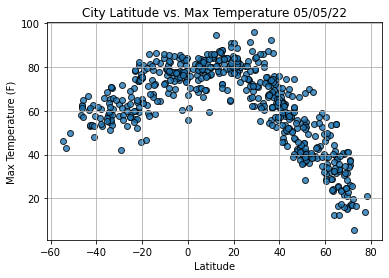

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

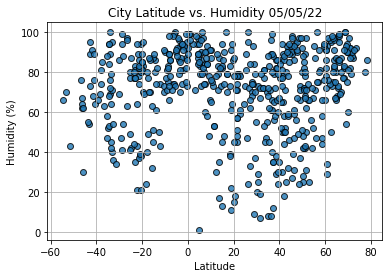

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

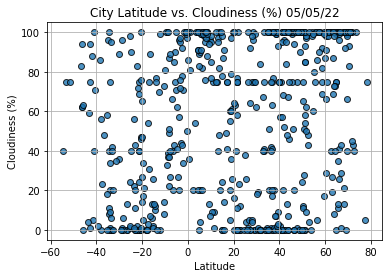

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

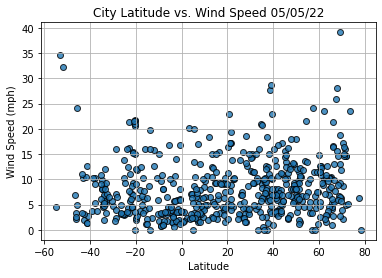

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                        Vaini
Lat                         -21.2
Lng                        -175.2
Max Temp                    80.76
Humidity                       78
Cloudiness                     75
Wind Speed                   9.22
Country                        TO
Date          2022-05-06 00:13:06
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
555    False
556    False
557     True
558    False
559     True
Name: Lat, Length: 560, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Beringovskiy,63.0500,179.3167,28.90,73,19,1.59,RU,2022-05-06 00:13:01
6,Sao Filipe,14.8961,-24.4956,72.21,82,24,4.72,CV,2022-05-06 00:13:03
9,Sahuaripa,29.0500,-109.2333,95.95,9,0,8.68,MX,2022-05-06 00:13:04
10,Kenai,60.5544,-151.2583,57.02,72,100,11.50,US,2022-05-06 00:13:05
11,Dudinka,69.4058,86.1778,15.62,91,100,18.72,RU,2022-05-06 00:13:06


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

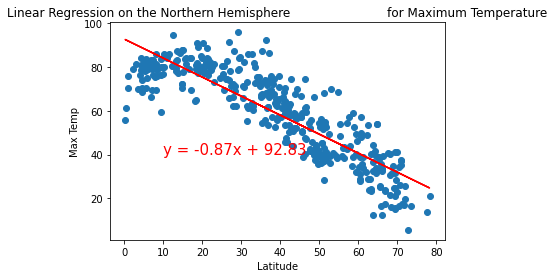

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

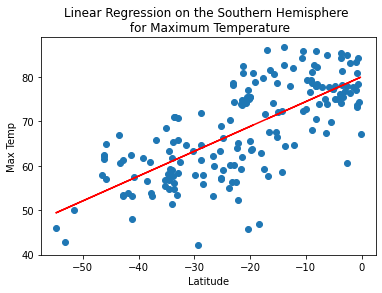

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

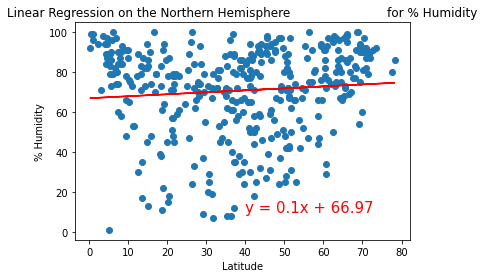

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

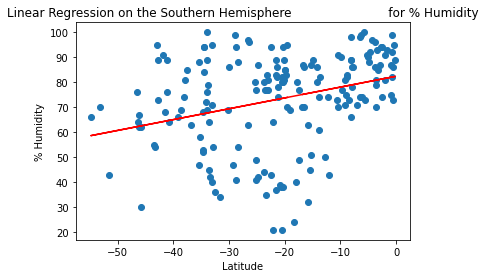

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))